# NIDHI NIGAM


1. Reading Data and cleanup

2. Univariant analysis (1. Employement Type  2. Company Locations) 

3. Bivariant analysis (1. Salary vs work year 
                       2. Salary vs Remote ratio )

4. multivariant analysis (1. Job Count Vs Job Title By Remote Ratio
                          2. Job Count VS Work Year By Remote Ratio
                          3. Job Count VS Employment Type By Remote Ratio
                          4. Job Count VS Job Titles By Company Size)


In [38]:
#1.Dataframe overview and cleanup

# Dependencies 
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st        
import numpy as np
import statistics as stat


#Reading the Data Set
df=pd.read_csv("./ds_salaries.csv")
df.head()

# DATA CLEANING

# Checking for missing values in the dataset
missing_values = df.isnull().sum()
missing_values

#Checking for null values
df.isna().sum()

#Find duplicate rows
duplicate_rows = df[df.duplicated()]
#Remove duplicate rows
df = df.drop_duplicates()
df

#dropiing the same information column for salary
df=df.drop(['salary','salary_currency'], axis=1)

#renaming employment types 
df['employment_type']=df['employment_type'].replace("FT", "Full-time")
df['employment_type']=df['employment_type'].replace("PT", "Part-time")
df['employment_type']=df['employment_type'].replace("CT", "Contractual")
df['employment_type']=df['employment_type'].replace("FL", "Freelancer")

#renaming company size
df['company_size']=df['company_size'].replace("L", "Large")
df['company_size']=df['company_size'].replace("M", "Medium")
df['company_size']=df['company_size'].replace("S", "Small")

df.head()

df.to_csv("output_data_NN/salaries.csv")

#Finding the number of rows and column of Data set
a, b = df.shape
print("Data_Set shape: rows {} & columns {}".format(a, b))

df.info()

df.describe()

Data_Set shape: rows 2584 & columns 9
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2584 entries, 0 to 3754
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           2584 non-null   int64 
 1   experience_level    2584 non-null   object
 2   employment_type     2584 non-null   object
 3   job_title           2584 non-null   object
 4   salary_in_usd       2584 non-null   int64 
 5   employee_residence  2584 non-null   object
 6   remote_ratio        2584 non-null   int64 
 7   company_location    2584 non-null   object
 8   company_size        2584 non-null   object
dtypes: int64(3), object(6)
memory usage: 201.9+ KB


,work_year,salary_in_usd,remote_ratio
count,2584.000000,2584.000000,2584.000000
mean,2022.301084,133409.280186,50.483746
std,0.749179,67136.837329,48.163707
min,2020.000000,5132.000000,0.000000
25%,2022.000000,84975.000000,0.000000
50%,2022.000000,130000.000000,50.000000
75%,2023.000000,175000.000000,100.000000
max,2023.000000,450000.000000,100.000000


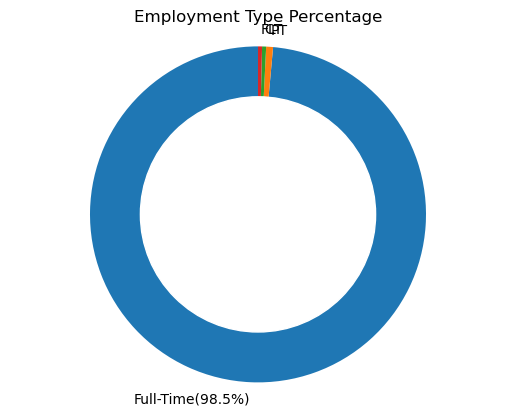

In [39]:
# Univariant Analysis (Employement Type)

employment_type = df["employment_type"].value_counts()
employment_type

# Employment_Type (Univariant Analysis)
employment_type = df["employment_type"].value_counts()

labels=["Full-Time(98.5%)", "PT", "CT", "FL"]
counts = [2547, 17, 10, 10]

# Create a pie chart
fig, ax = plt.subplots()
ax.pie(counts,labels=labels, startangle=90)

# Draw a white circle in the middle to create the donut effect
circle = plt.Circle((0, 0), 0.7, color='white')
ax.add_artist(circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')
plt.title('Employment Type Percentage')



# Saving Plot to output_data_NN

plt.savefig("output_data_NN/Fig1_employtype.png")
plt.show()


# ANALYSIS - After the univariant analysis of this dataset for the employment type,the conclusion can be that 98.56% of Data Science Jobs
#falls in to Full Time employemnet type.


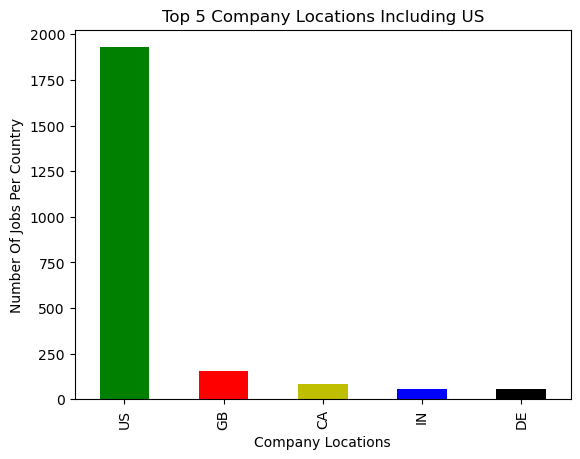

In [40]:
# Univariant Analysis (Company Locations)

#Top 5 company loations (including US)

company_locations_counts=df["company_location"].value_counts()
top5_company_locations_us= company_locations_counts.head(5)

top5_company_locations_us.plot(
    kind="bar",
    color=["g","r","y","b","k"],
    title="Top 5 Company Locations Including US",
    ylabel = "Number Of Jobs Per Country", 
    xlabel ="Company Locations",

)
# Saving Plot to output_data_NN
plt.savefig("output_data_NN/Fig2_complocs.png")
plt.show()



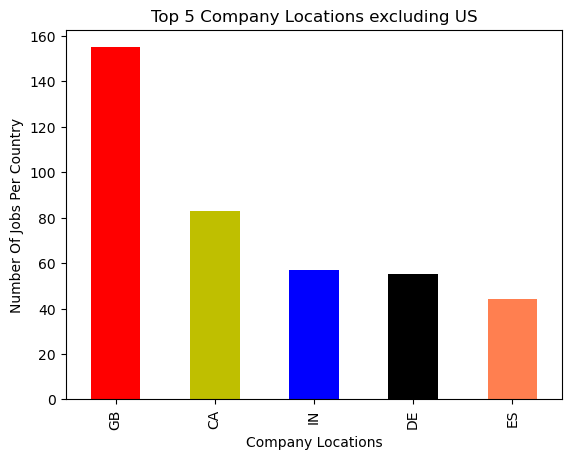

In [41]:
#Top 5 company loations (Excluding US)

new_df = df[df["company_location"]!= "US"]
new_df
company_location_counts = new_df["company_location"].value_counts()
top5_company_location = company_location_counts.head()
top5_company_location.plot(
    kind="bar",
    color=["r","y","b","k","coral"],
    title="Top 5 Company Locations excluding US",
    ylabel = "Number Of Jobs Per Country", 
    xlabel ="Company Locations",
    
)

# Saving Plot to output_data_NN
plt.savefig("output_data_NN/Fig2_complocs_noUS.png")
plt.show()



#ANALYSIS - #After looking in to the univariant anlysis, We may see that the companies located in USA 
#is already hosting more than 90% of the jobs. If we remove the USA from the anaysis, The next five countries for stake 
#holders to experience a good competition, will be Great Britain, Canada, India , Germany and Spain. 


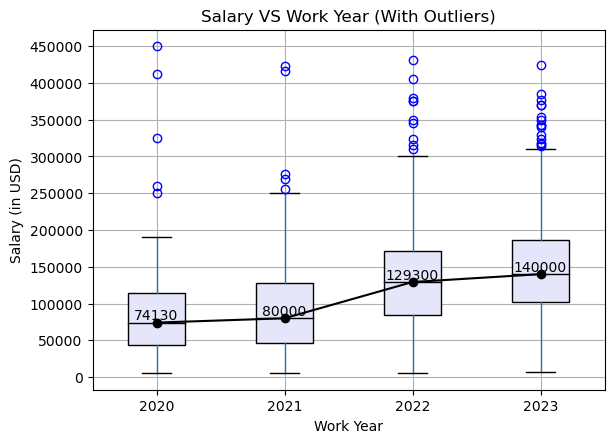

In [42]:
# Pair Plotting or Bivariant Analysis (Salary VS Work Year)

import matplotlib.pyplot as plt

a = "blue"
b = "black"
c = "lavender"

# Calculate median values
medians = df.groupby("work_year")["salary_in_usd"].median()
median_positions = range(1, len(medians) + 1)

# Create the boxplot
boxplot = df.boxplot(
    column=["salary_in_usd"],
    by=["work_year"],
    patch_artist=True,
    boxprops=dict(facecolor=c),
    flierprops=dict(color=a, markeredgecolor=a),
    medianprops=dict(color=b),
)

# Add median values as annotations inside the box
for i, med in enumerate(medians):
    plt.text(median_positions[i], med, f"{med:.0f}", ha="center", va="bottom", color=b)

# Draw lines connecting the medians
plt.plot(median_positions, medians, marker='o', color=b, linestyle='-')

plt.title("Salary VS Work Year (With Outliers)")
plt.xlabel("Work Year")
plt.ylabel("Salary (in USD)")
plt.suptitle("")  # This removes the automatic title generated by boxplot()
plt.xticks(ticks=median_positions, labels=medians.index)  # Set x-tick labels to be work years

y_ticks = np.arange(0, 500000, 50000)
plt.yticks(y_ticks)

# Saving Plot to output_data_NN
plt.savefig("output_data_NN/Fig3_salary_workyear_outliers.png")

plt.show()


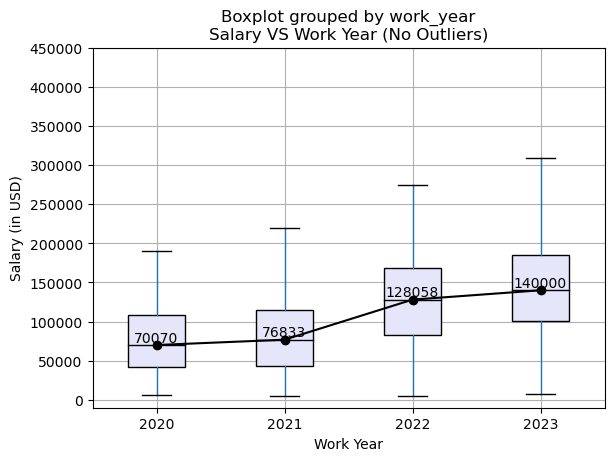

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Removing outliers in salary_in_usd for different categories of experience_level
df_remove_outlier1 = df[(df["salary_in_usd"] < 250000) & (df["work_year"] == 2020)]
df_remove_outlier2 = df[(df["salary_in_usd"] < 225000) & (df["work_year"] == 2021)]
df_remove_outlier3 = df[(df["salary_in_usd"] < 295000) & (df["work_year"] == 2022)]
df_remove_outlier4 = df[(df["salary_in_usd"] < 310000) & (df["work_year"] == 2023)]

# Concatenate the filtered dataframes
dataframes = [df_remove_outlier1, df_remove_outlier2, df_remove_outlier3, df_remove_outlier4]
final_df_remove_outlier = pd.concat(dataframes)

# Set option to display all rows in the dataframe
pd.set_option('display.max_rows', None)

# Calculate median values
medians1 = final_df_remove_outlier.groupby("work_year")["salary_in_usd"].median()
median_positions = range(1, len(medians1) + 1)

# Create the boxplot
final_df_remove_outlier.boxplot(
    column=["salary_in_usd"],
    by=["work_year"],
    patch_artist=True,
    boxprops=dict(facecolor=c),
    flierprops=dict(color=a, markeredgecolor=a),
    medianprops=dict(color=b)
)

# Add median values as annotations
for i, med in enumerate(medians1):
    plt.text(median_positions[i], med, f"{med:.0f}", ha="center", va="bottom", color=b)

# Draw lines connecting the medians
plt.plot(median_positions, medians1, marker='o', color=b, linestyle='-')

plt.title('Salary VS Work Year (No Outliers)')
plt.xlabel('Work Year')
plt.ylabel('Salary (in USD)')

y_ticks = np.arange(0, 500000, 50000)
plt.yticks(y_ticks)

# Saving Plot to output_data_NN
plt.savefig("output_data_NN/Fig3_salary_workyear_nooutliers.png")
plt.show()

# ANALYSIS - This data do have a lot of outliers, and median salary levels drop significantly after removing outliers. But with or without outliers,
# after comparing the box plot, we can deduce that median salaries were almost the same in the years 2020 and 2021. However, in the years 2022 and 2023, they experienced a substantial increase.


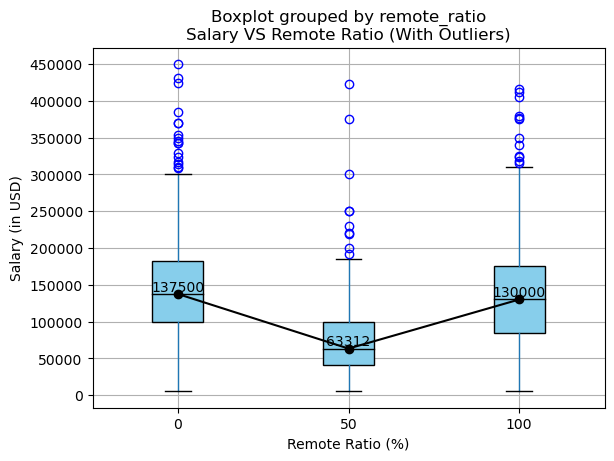

In [44]:
# Pair Plotting or Bivariant Analysis (Salary VS Remote Ratio)

import matplotlib.pyplot as plt

a = "blue"
b = "black"
c = "skyblue"

# Calculate median values
medians2 = df.groupby("remote_ratio")["salary_in_usd"].median()
median_positions = range(1, len(medians2) + 1)

# Create the boxplot
df.boxplot(
    column=["salary_in_usd"],
    by=["remote_ratio"],
    patch_artist=True,
    boxprops=dict(facecolor=c),
    flierprops=dict(color=a, markeredgecolor=a),
    medianprops=dict(color=b)
)

plt.title('Salary VS Remote Ratio (With Outliers)')
plt.xlabel('Remote Ratio (%)')
plt.ylabel('Salary (in USD)')

# Add median values as annotations
for i, med in enumerate(medians2):
    plt.text(median_positions[i], med, f"{med:.0f}", ha="center", va="bottom", color=b)

# Draw lines connecting the medians
plt.plot(median_positions, medians2, marker='o', color=b, linestyle='-')

y_ticks = range(0, 500000, 50000)
plt.yticks(y_ticks)

# Saving Plot to output_data_NN
plt.savefig("output_data_NN/Fig4_salary_remoteratio_outliers.png")
plt.show()


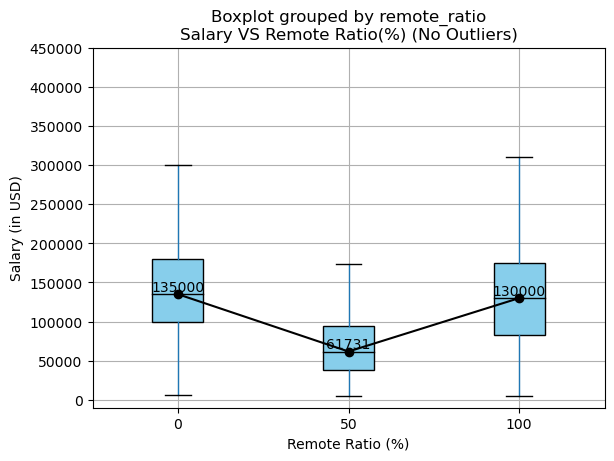

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Removing outliers in salary_in_usd for different categories of remote_ratio
df_remove_outliera = df[(df["salary_in_usd"] < 300000) & (df["remote_ratio"] == 0)]
df_remove_outlierb = df[(df["salary_in_usd"] < 185000) & (df["remote_ratio"] == 50)]
df_remove_outlierc = df[(df["salary_in_usd"] < 315000) & (df["remote_ratio"] == 100)]

# Concatenate the filtered dataframes
dataframes = [df_remove_outliera, df_remove_outlierb, df_remove_outlierc]
final_df_remove_outlierr = pd.concat(dataframes)

# Set option to display all rows in the dataframe
pd.set_option('display.max_rows', None)

# Calculate median values
medians3 = final_df_remove_outlierr.groupby("remote_ratio")["salary_in_usd"].median()
median_positions = range(1, len(medians3) + 1)

# Create the boxplot
final_df_remove_outlierr.boxplot(
    column=["salary_in_usd"],
    by=["remote_ratio"],
    patch_artist=True,
    boxprops=dict(facecolor=c),
    flierprops=dict(color=a, markeredgecolor=a),
    medianprops=dict(color=b)
)

# Add median values as annotations
for i, med in enumerate(medians3):
    plt.text(median_positions[i], med, f"{med:.0f}", ha="center", va="bottom", color=b)

# Draw lines connecting the medians
plt.plot(median_positions, medians3, marker='o', color=b, linestyle='-')

plt.title('Salary VS Remote Ratio(%) (No Outliers)')
plt.xlabel('Remote Ratio (%)')
plt.ylabel('Salary (in USD)')

y_ticks = np.arange(0, 500000, 50000)
plt.yticks(y_ticks)

# Saving Plot to output_data_NN
plt.savefig("output_data_NN/Fig4_salary_remoteratio_nooutliers.png")
plt.show()

# ANALYSIS - Similar to the previous case, this data also had a lot of outliers, and median salary levels dropped significantly after removing outliers.
# But with or without outliers, after comparing the box plot, we can deduce that median salaries were substantially lower for the hybrid model as compared to fully remote or in-office work models.


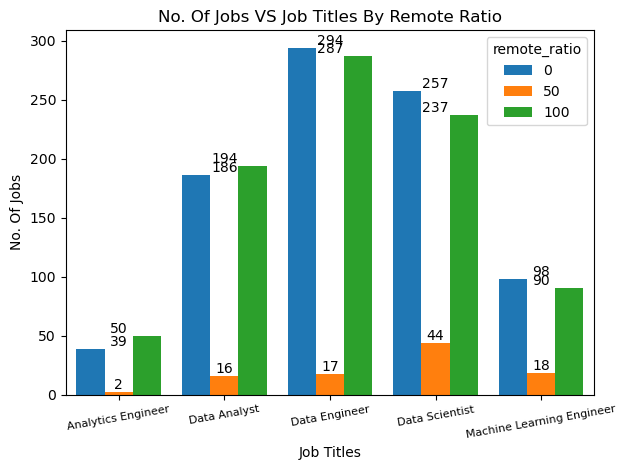

In [46]:
# Multivariant Analysis (No. Of Jobs VS Job Titles By Remote Ratio)

# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st        
import numpy as np
import statistics as stat

# Reading the Data Set
df = pd.read_csv("./ds_salaries.csv")
df.head()

# DATA CLEANING

# Checking for missing values in the dataset
missing_values = df.isnull().sum()
missing_values

# Checking for null values
df.isna().sum()

# Find duplicate rows
duplicate_rows = df[df.duplicated()]
# Remove duplicate rows
df = df.drop_duplicates()
df

# JOB TITLE VS REMOTE RATIO

reduced_dataframe = df.groupby(["job_title"]).remote_ratio.value_counts().reset_index(name="no_of_jobs")
largest_five_residence_series = reduced_dataframe.groupby(["job_title"])["no_of_jobs"].sum().nlargest(5)
making_dataframe = largest_five_residence_series.to_frame().reset_index()
final_dataframe_largefive_residence = reduced_dataframe[reduced_dataframe["job_title"].isin(making_dataframe["job_title"])]
pivot_dataframe_plotting = final_dataframe_largefive_residence.pivot(index="job_title", columns="remote_ratio", values="no_of_jobs")


# Calculate the width of the bars (adjust the value as needed)
bar_width = 0.8

# Plotting the bar chart with adjusted bar width
ax = pivot_dataframe_plotting.plot(kind="bar", width=bar_width)

# Add labels for each bar's value on top of the bar
for i in range(len(pivot_dataframe_plotting)):
    for j in range(len(pivot_dataframe_plotting.columns)):
        value = pivot_dataframe_plotting.iloc[i, j]
        ax.text(i, value, str(value), ha='center', va='bottom', fontsize=10)  # Adjust 'va' to 'bottom'

plt.xticks(rotation=10, fontsize=8)
plt.title('No. Of Jobs VS Job Titles By Remote Ratio')
plt.xlabel('Job Titles')
plt.ylabel('No. Of Jobs')

# Adjust the x-axis limits to increase its length
plt.xlim(-0.5, len(pivot_dataframe_plotting) - 0.5)

plt.tight_layout()  # Ensures that labels do not overlap
plt.savefig("output_data_NN/Fig5_salary_remote_ratio.png")

plt.show()

# ANALYSIS - We can easily analyze from the plot that for every job title,
# Hybrid model was not favorable; however, fully
# remote or on-site work models are preferable by companies.


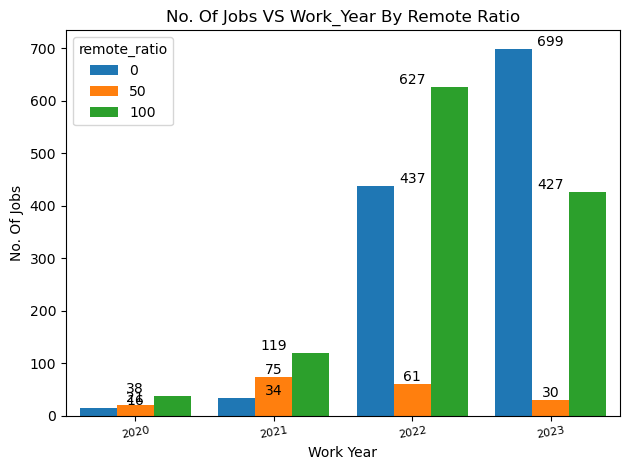

In [47]:
# Multivariant Analysis (No. Of Jobs VS Work Year By Remote Ratio)


reduced_dataframe = df.groupby(["work_year"]).remote_ratio.value_counts().reset_index(name="no_of_jobs")
largest_five_residence_series = reduced_dataframe.groupby(["work_year"])["no_of_jobs"].sum().nlargest(5)
making_dataframe = largest_five_residence_series.to_frame().reset_index()
final_dataframe_largefive_residence = reduced_dataframe[reduced_dataframe["work_year"].isin(making_dataframe["work_year"])]
pivot_dataframe_plotting = final_dataframe_largefive_residence.pivot(index="work_year", columns="remote_ratio", values="no_of_jobs")


# Calculate the width of the bars (adjust the value as needed)
bar_width = 0.8

# Plotting the bar chart with adjusted bar width
ax = pivot_dataframe_plotting.plot(kind="bar", width=bar_width)

# Add labels for each bar's value on top of the bar
for i in range(len(pivot_dataframe_plotting)):
    for j in range(len(pivot_dataframe_plotting.columns)):
        value = pivot_dataframe_plotting.iloc[i, j]
        ax.text(i, value, str(value), ha='center', va='bottom', fontsize=10)  # Adjust 'va' to 'bottom'

plt.xticks(rotation=10, fontsize=8)
plt.title('No. Of Jobs VS Work_Year By Remote Ratio')
plt.xlabel('Work Year')
plt.ylabel('No. Of Jobs')

# Adjust the x-axis limits to increase its length
plt.xlim(-0.5, len(pivot_dataframe_plotting) - 0.5)


plt.tight_layout()  # Ensures that labels do not overlap
plt.savefig("output_data_NN/Fig6_workyear_remote_ratio.png")

plt.show()

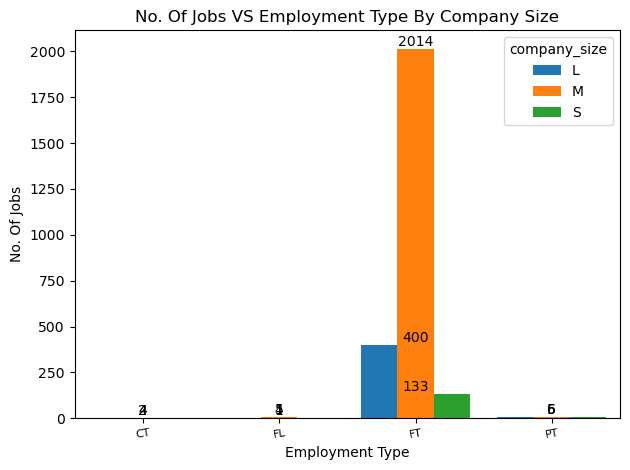

In [48]:
# Multivariant Analysis (No. Of Jobs VS Employment Type By Remote Ratio)

reduced_dataframe = df.groupby(["employment_type"]).company_size.value_counts().reset_index(name="no_of_jobs")
largest_five_residence_series = reduced_dataframe.groupby(["employment_type"])["no_of_jobs"].sum().nlargest(5)
making_dataframe = largest_five_residence_series.to_frame().reset_index()
final_dataframe_largefive_residence = reduced_dataframe[reduced_dataframe["employment_type"].isin(making_dataframe["employment_type"])]
pivot_dataframe_plotting = final_dataframe_largefive_residence.pivot(index="employment_type", columns="company_size", values="no_of_jobs")


# Calculate the width of the bars (adjust the value as needed)
bar_width = 0.8

# Plotting the bar chart with adjusted bar width
ax = pivot_dataframe_plotting.plot(kind="bar", width=bar_width)

# Add labels for each bar's value on top of the bar
for i in range(len(pivot_dataframe_plotting)):
    for j in range(len(pivot_dataframe_plotting.columns)):
        value = pivot_dataframe_plotting.iloc[i, j]
        ax.text(i, value, str(value), ha='center', va='bottom', fontsize=10)  # Adjust 'va' to 'bottom'

plt.xticks(rotation=10, fontsize=8)
plt.title('No. Of Jobs VS Employment Type By Company Size')
plt.xlabel('Employment Type')
plt.ylabel('No. Of Jobs')

# Adjust the x-axis limits to increase its length
plt.xlim(-0.5, len(pivot_dataframe_plotting) - 0.5)

plt.tight_layout()  # Ensures that labels do not overlap
plt.savefig("output_data_NN/Fig7_employtype_companysize.png")

plt.show()


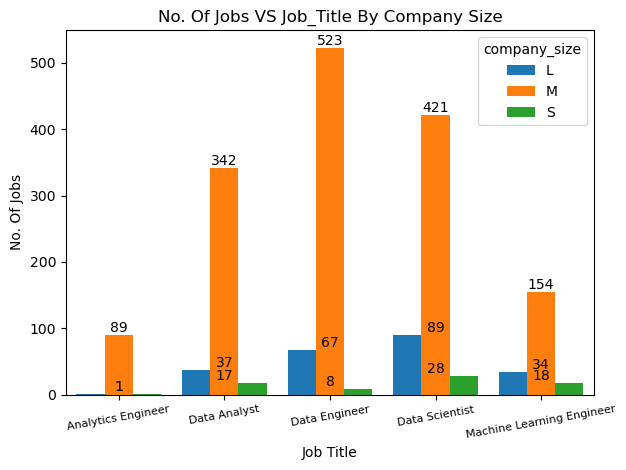

In [49]:
# Multivariant Analysis (No. Of Jobs VS Job Titles By Company Size)


reduced_dataframe = df.groupby(["job_title"]).company_size.value_counts().reset_index(name="no_of_jobs")
largest_five_residence_series = reduced_dataframe.groupby(["job_title"])["no_of_jobs"].sum().nlargest(5)
making_dataframe = largest_five_residence_series.to_frame().reset_index()
final_dataframe_largefive_residence = reduced_dataframe[reduced_dataframe["job_title"].isin(making_dataframe["job_title"])]
pivot_dataframe_plotting = final_dataframe_largefive_residence.pivot(index="job_title", columns="company_size", values="no_of_jobs")


# Calculate the width of the bars (adjust the value as needed)
bar_width = 0.8

# Plotting the bar chart with adjusted bar width
ax = pivot_dataframe_plotting.plot(kind="bar", width=bar_width)

# Add labels for each bar's value on top of the bar
for i in range(len(pivot_dataframe_plotting)):
    for j in range(len(pivot_dataframe_plotting.columns)):
        value = pivot_dataframe_plotting.iloc[i, j]
        ax.text(i, value, str(value), ha='center', va='bottom', fontsize=10)  # Adjust 'va' to 'bottom'

plt.xticks(rotation=10, fontsize=8)
plt.title('No. Of Jobs VS Job_Title By Company Size')
plt.xlabel('Job Title')
plt.ylabel('No. Of Jobs')

# Adjust the x-axis limits to increase its length
plt.xlim(-0.5, len(pivot_dataframe_plotting) - 0.5)

plt.tight_layout()  # Ensures that labels do not overlap
plt.savefig("output_data_NN/Fig8_jobtitle_companysize.png")

plt.show()
